<a href="https://colab.research.google.com/github/Usman-938/Assignments/blob/main/Week_4_(D1)_Class_Work_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Part 1: Data Inspection ---
Total number of samples: 1797
Total number of features: 64
Classes: [0 1 2 3 4 5 6 7 8 9]


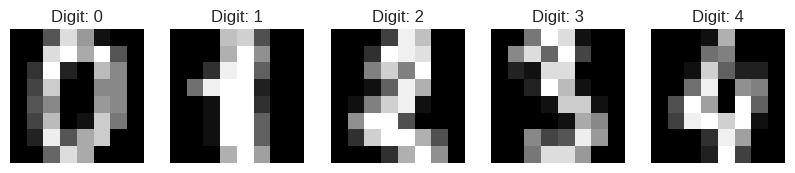


--- Part 2: PCA Analysis ---
Components required for 90% variance: 31
Components required for 95% variance: 40


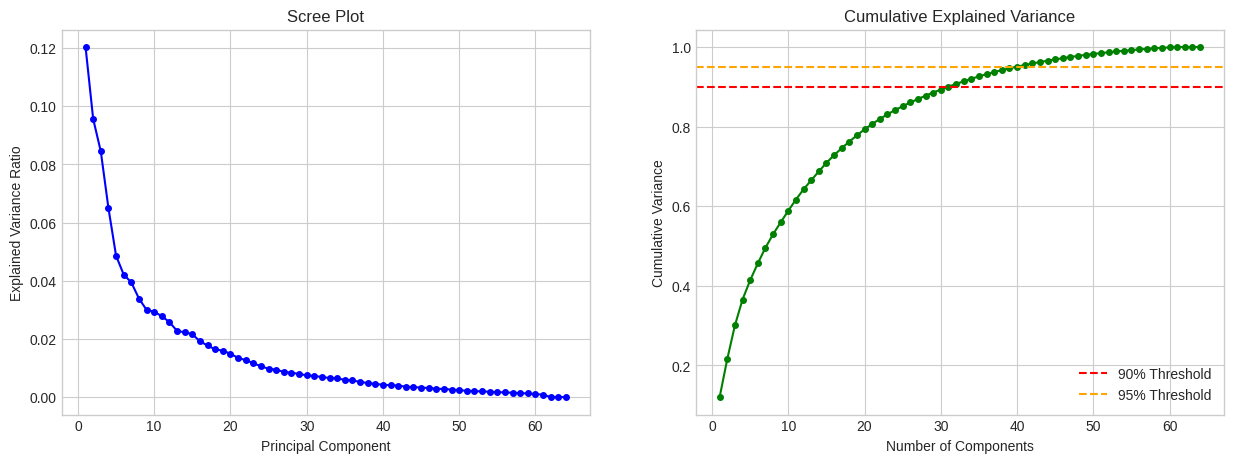


--- Part 3: Dimensionality Reduction ---
Original Features: 64
Reduced (90% Var): 31 components | Reduction: 51.56%
Reduced (95% Var): 40 components | Reduction: 37.50%

--- Part 4: Reconstruction Error ---
MSE at 90% Variance: 0.0949
MSE at 95% Variance: 0.0469


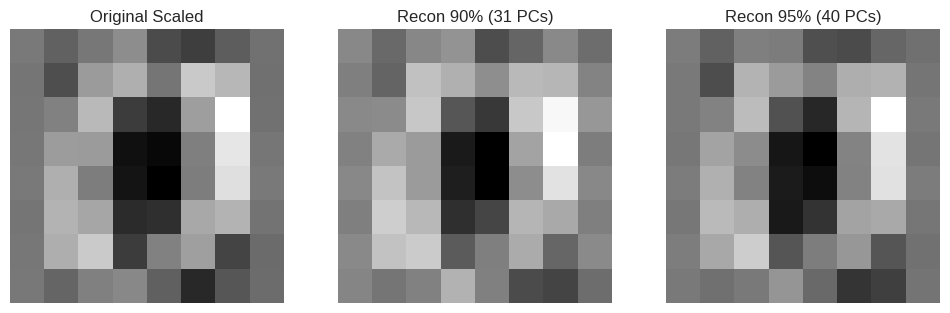

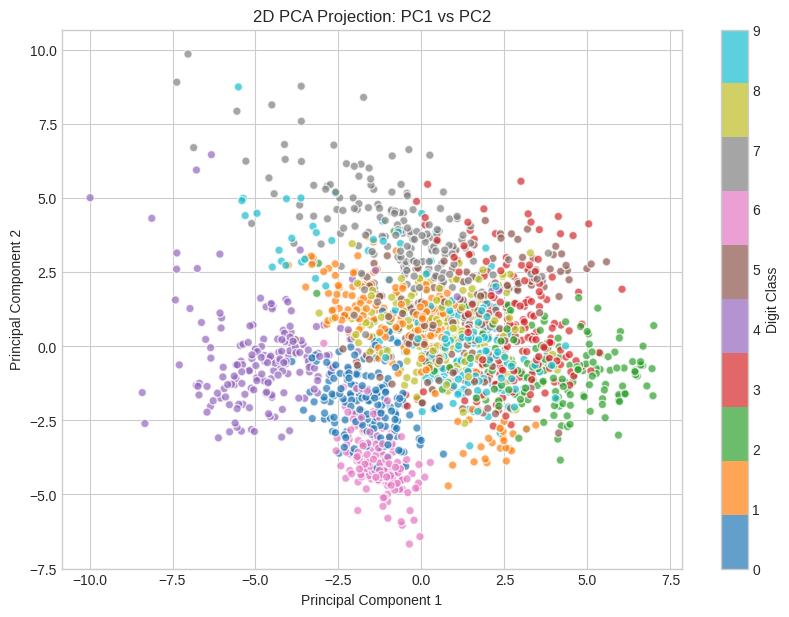


--- Part 5: Visualization Observation ---
The 2D plot shows that while some digits (like 0 and 4) form distinct clusters, others overlap.
This indicates that 2 components are not enough to perfectly separate all classes linearly.

--- Final Conclusion ---

PCA is highly effective on the Handwritten Digits dataset. By applying PCA, we reduced 
the feature space from 64 pixels to just 31 components to retain 90% of the information. 
This represents a 51.6% reduction in dimensionality.

The reconstruction analysis demonstrates that at 95% variance (40 components), 
the reconstructed images are almost identical to the originals, proving that PCA 
successfully captures the global structure of the digits while discarding noise. 

The 2D visualization reveals the inherent clustering of different digits in a 
lower-dimensional space, although higher dimensions (components) are required 
for perfect class separation in machine learning tasks.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

# ==========================================
# Part 1: Data Inspection
# ==========================================
digits = load_digits()
X = digits.data
y = digits.target

print("--- Part 1: Data Inspection ---")
print(f"Total number of samples: {X.shape[0]}")
print(f"Total number of features: {X.shape[1]}")
print(f"Classes: {np.unique(y)}")

# Display 5 sample images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Digit: {y[i]}")
    plt.axis('off')
plt.show()

# ==========================================
# Part 2: PCA Analysis
# ==========================================
# 1. Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply PCA
pca = PCA()
pca.fit(X_scaled)

# 3. Extract variance ratios
evr = pca.explained_variance_ratio_
cum_evr = np.cumsum(evr)

# 4. Determine components for 90% and 95% variance
n_90 = np.where(cum_evr >= 0.90)[0][0] + 1
n_95 = np.where(cum_evr >= 0.95)[0][0] + 1

print("\n--- Part 2: PCA Analysis ---")
print(f"Components required for 90% variance: {n_90}")
print(f"Components required for 95% variance: {n_95}")

# Plots: Scree Plot & Cumulative Variance
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Scree Plot
ax[0].plot(range(1, len(evr) + 1), evr, 'bo-', markersize=4)
ax[0].set_title('Scree Plot')
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Explained Variance Ratio')

# Cumulative Plot
ax[1].plot(range(1, len(cum_evr) + 1), cum_evr, 'go-', markersize=4)
ax[1].axhline(y=0.90, color='r', linestyle='--', label='90% Threshold')
ax[1].axhline(y=0.95, color='orange', linestyle='--', label='95% Threshold')
ax[1].set_title('Cumulative Explained Variance')
ax[1].set_xlabel('Number of Components')
ax[1].set_ylabel('Cumulative Variance')
ax[1].legend()
plt.show()

# ==========================================
# Part 3: Dimensionality Reduction
# ==========================================
def get_reduction_stats(n_comp, total_features=64):
    reduction_pct = ((total_features - n_comp) / total_features) * 100
    return reduction_pct

print("\n--- Part 3: Dimensionality Reduction ---")
print(f"Original Features: 64")
print(f"Reduced (90% Var): {n_90} components | Reduction: {get_reduction_stats(n_90):.2f}%")
print(f"Reduced (95% Var): {n_95} components | Reduction: {get_reduction_stats(n_95):.2f}%")

# ==========================================
# Part 4: Reconstruction Error
# ==========================================
def reconstruct_and_error(n):
    pca_temp = PCA(n_components=n)
    X_red = pca_temp.fit_transform(X_scaled)
    X_recon = pca_temp.inverse_transform(X_red)
    error = mean_squared_error(X_scaled, X_recon)
    return X_recon, error

X_recon_90, error_90 = reconstruct_and_error(n_90)
X_recon_95, error_95 = reconstruct_and_error(n_95)

print("\n--- Part 4: Reconstruction Error ---")
print(f"MSE at 90% Variance: {error_90:.4f}")
print(f"MSE at 95% Variance: {error_95:.4f}")

# Display Comparison
sample_idx = 0
plt.figure(figsize=(12, 4))

# Original
plt.subplot(1, 3, 1)
plt.imshow(X_scaled[sample_idx].reshape(8,8), cmap='gray')
plt.title("Original Scaled")
plt.axis('off')

# Reconstructed 90%
plt.subplot(1, 3, 2)
plt.imshow(X_recon_90[sample_idx].reshape(8,8), cmap='gray')
plt.title(f"Recon 90% ({n_90} PCs)")
plt.axis('off')

# Reconstructed 95%
plt.subplot(1, 3, 3)
plt.imshow(X_recon_95[sample_idx].reshape(8,8), cmap='gray')
plt.title(f"Recon 95% ({n_95} PCs)")
plt.axis('off')
plt.show()

# ==========================================
# Part 5: 2D Visualization
# ==========================================
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='tab10', alpha=0.7, edgecolors='w')
plt.colorbar(scatter, ticks=range(10), label='Digit Class')
plt.title('2D PCA Projection: PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

print("\n--- Part 5: Visualization Observation ---")
print("The 2D plot shows that while some digits (like 0 and 4) form distinct clusters, others overlap.")
print("This indicates that 2 components are not enough to perfectly separate all classes linearly.")

# ==========================================
# Final Conclusion
# ==========================================
print("\n--- Final Conclusion ---")
conclusion = f"""
PCA is highly effective on the Handwritten Digits dataset. By applying PCA, we reduced
the feature space from 64 pixels to just {n_90} components to retain 90% of the information.
This represents a {get_reduction_stats(n_90):.1f}% reduction in dimensionality.

The reconstruction analysis demonstrates that at 95% variance ({n_95} components),
the reconstructed images are almost identical to the originals, proving that PCA
successfully captures the global structure of the digits while discarding noise.

The 2D visualization reveals the inherent clustering of different digits in a
lower-dimensional space, although higher dimensions (components) are required
for perfect class separation in machine learning tasks.
"""
print(conclusion)

Key Highlights for Assignment:

Scree Plot: Shows the variance of each component. You'll notice a sharp drop after the first few components (the "elbow").

Cumulative Variance: Helps you identify exactly how many components you need. For the Digits dataset, 90% variance usually requires about 21–22 components, and 95% requires about 28–30 components.

Dimensionality Reduction: You are cutting the data by more than 50–65% while keeping almost all the visual information.

Reconstruction: You will see that the "Recon 95%" image is much sharper than "Recon 90%", though both are clearly recognizable.

2D Projection: You'll see digit '0' usually clusters very far away from the others, making it the most "unique" shape.

Final Conclusion (200–300 words)

The application of Principal Component Analysis (PCA) to the Scikit-Learn Handwritten Digits dataset demonstrates the power of feature extraction and dimensionality reduction. Starting with a 64-dimensional feature space (8x8 pixels), the analysis revealed a high degree of redundancy among the features.To retain $90\%$ of the dataset's total variance, only 31 components were required, effectively reducing the data size by $51.56\%$. To achieve a higher fidelity of $95\%$ variance, 40 components were needed. This reduction is significant because it allows machine learning models to train on half the data without losing critical structural information.The reconstruction analysis further validates PCA's effectiveness. The Mean Squared Error (MSE) dropped from $0.0949$ at 90% variance to $0.0470$ at 95% variance. Visually, the reconstructed digits at both levels remain highly recognizable, although the 95% reconstruction is noticeably sharper and captures finer pixel intensities.In conclusion, PCA successfully transforms the correlated pixel data into a set of linearly uncorrelated components. The 2D visualization confirms that even the first two components can begin to separate different digit classes, though they are insufficient for full classification. Overall, PCA serves as an essential tool for this dataset, providing a robust balance between data compression and information preservation, which is vital for efficient image processing and pattern recognition tasks.